In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder  
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt

In [37]:
def average_value(value):
    value = str(value)
    if '~' in value:
        values = value.split('~')
    elif '～' in value:
        values = value.split('～')
    elif '-' in value:
        values = value.split('-')
    else:
        return float(value)

    start_value = float(values[0])
    end_value = float(values[1])
    average = (start_value + end_value) / 2

    return round(average, 2)

研究所复核储量丰度-2023.6.30(108m3/km2): 0.3576300556220311
I类储层连续厚度(m): 0.09139631266763315
龙一11 (1类厚度)(m): 0.07421868595737903
平均停泵压力(MPa): 0.057159192207544354
压裂结束停泵压力(MPa): 0.04207488801307046
龙一11压力系数: 0.038268099837474284
I类储层厚度(m): 0.036015052414590354
实际射孔簇数: 0.029060568191112728
100目石英砂(t): 0.023767831048873984
簇间距(m): 0.019228286550991135
开始排液时井口套压(MPa): 0.01806546317569749
排量（m3/min）: 0.017485999581877243
用液强度(m3/m): 0.016830679112844173
总液量(m3): 0.016558457720117985
优质页岩钻遇率（%）: 0.01475997257943983
陶粒比例（%）: 0.014688763421232499
投产前返排率(%): 0.011457562138661928
分段段长(m): 0.009728654597704792
线性胶(m3): 0.009456679594435743
合压长度(m): 0.00848992487096216
平均单段液量(m3): 0.008278790094071556
平均单段砂量(t): 0.007898960097370053
龙一11水平长度(m): 0.007581217710992946
折算有效段数: 0.007396025076759972
主体射孔密度(P/m): 0.007113409778742009
井间距(m): 0.006985190948420661
投产前累计排液量(m3): 0.004738607319687914
40/70目陶粒(t): 0.0047168420983439195
总砂量(t): 0.004539323001030828
主体单段簇数: 0.004306483891385075
龙一11钻遇率(%): 0.004215177

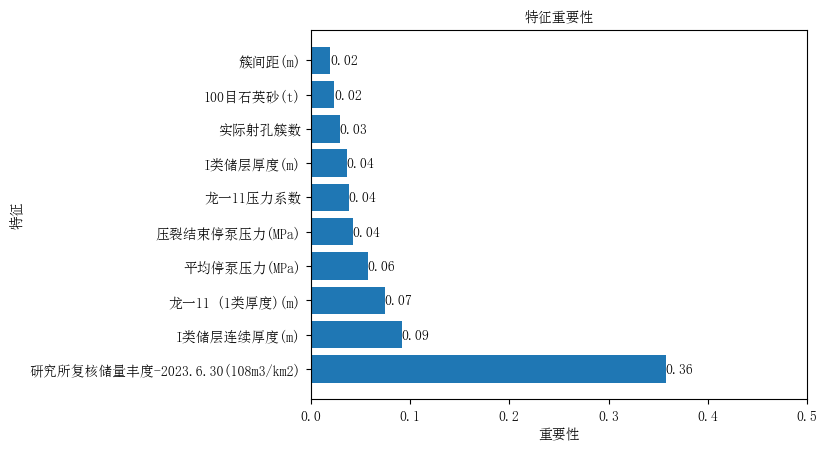

In [38]:
df = pd.read_excel('data/开发大表.xlsx', sheet_name='地质工程开发一体化数据')
# print(df.columns)
y_name = '第六年累产气量(104m3)'
dropColumns = ['方案','统计时间','投产时间','目前累产气量\n万方（23.6.30）', '生产时间','首年日产（104m3/d）','平均首年日产(104m3/d)',
        '平均首年日产(104m3/d)',  '第二年产气量(104m3)', '第三年产气量(104m3)', '第四年产气量(104m3)',
       '第五年产气量(104m3)', '第六年产气量(104m3)', '第二年累产气量(104m3)', '第三年累产气量(104m3)',
       '第四年累产气量(104m3)', '第五年累产气量(104m3)', '第六年累产气量(104m3)','实际\n压裂\n次数','气井分类','甜点分区',
         '研究所复核井控储量23.5(108m3)', '研究所复核采收率',#'研究所复核储量丰度-2023.6.30(108m3/km2)',
         '测试产量(104m3/d)','EUR(亿方）\n(研究所-23.6)','实际压\n裂段长(m)','首年产气量(104m3)','90天累产(104m3)']

# 使用列表推导式删除特定值
dropColumns = [x for x in dropColumns if x != y_name]

df.drop(dropColumns, axis=1, inplace=True)

df.dropna(axis=0, subset=[y_name], inplace=True)#删除90天累产中为空的行
# 设置索引列为'井号'
df.set_index('井号', inplace=True)
#将属性数据编码为数值
le2 = LabelEncoder()
df['是否\n套变'] = le2.fit_transform(df['是否\n套变'])

# 指定列名，将含有空值的特定列填充为0
df['合压\n长度\n(m)'].fillna(0, inplace=True)
df['丢段\n长度(m)'].fillna(0, inplace=True)
df['40/70目石英砂(t)'].fillna(0, inplace=True)
df['40/70目陶粒(t)'].fillna(0, inplace=True)
df['30/50目陶粒(t)'].fillna(0, inplace=True)
df['酸液\n(m3)'].fillna(0, inplace=True)
df['线性胶\n(m3)'].fillna(0, inplace=True)
df['弱凝胶\n(m3)'].fillna(0, inplace=True)

# 对特定列取绝对值,里面有括号的值会错误读取为负数
df['焖井时间(天)'] = df['焖井时间(天)'].abs()

# 处理 龙一11压力系数、排量\n（m3/min） 中的范围数值，如1.6~1.7
values1 = df['龙一11压力系数'].tolist()
values2 = df['排量\n（m3/min）'].tolist()

# 遍历特定列的每一个值，重新赋值
indexs = df.index.tolist()
for i in range(len(indexs)):
    df.loc[indexs[i], '龙一11压力系数'] = average_value(values1[i])
    df.loc[indexs[i], '排量\n（m3/min）'] = average_value(values2[i])

# 保存为csv文件
# df.to_csv('data/开发大表_修订.csv', index=True)
# aa

feature_names = df.columns.tolist()
# 使用列表推导式删除特定值
feature_names = [x for x in feature_names if x != y_name]
y = df[y_name]
X = df[feature_names]

from matplotlib.font_manager import FontProperties
my_model = RandomForestRegressor().fit(X, y)

sorted_importances = []
sorted_features = []
# 打印每个特征的重要性程度
feature_importances = list(zip(X.columns, my_model.feature_importances_))
feature_importances.sort(key=lambda x: x[1], reverse=True)  # 按重要性程度进行降序排序

for feature, importance in feature_importances:
    feature = feature.replace('\n', '')
    sorted_features.append(feature)
    sorted_importances.append(importance)
    print(f"{feature}: {importance}")

sorted_features = sorted_features[0:10]
sorted_importances = sorted_importances[0:10]

# 设置中文字体
font = FontProperties(fname=r"SimSun.ttf")  # 替换成你电脑上的中文字体文件路径
plt.rcParams['font.sans-serif'] = [font.get_name()]  # 在绘制时使用这个字体  
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号  

fig, ax = plt.subplots()
ax.set_xlim(0, 0.5)
bars = ax.barh(sorted_features, sorted_importances)
ax.set_xlabel("重要性", fontproperties=font)
ax.set_ylabel("特征", fontproperties=font)
ax.set_title("特征重要性", fontproperties=font )
for bar in bars:
    width = bar.get_width()
    # ax.text(width, bar.get_y() + bar.get_height() / 2, '%.3e' % width, ha='left', va='center')
    ax.text(width, bar.get_y() + bar.get_height() / 2, "{:.2f}".format(width), ha='left', va='center')
plt.savefig('feature_importances.png', dpi=600, bbox_inches='tight')
plt.show()



In [49]:
df = pd.read_excel('data/开发大表.xlsx', sheet_name='地质工程开发一体化数据')
# print(df.columns)
df.drop(['方案','统计时间','投产时间','目前累产气量\n万方（23.6.30）', '生产时间','首年日产（104m3/d）','平均首年日产(104m3/d)',
        '平均首年日产(104m3/d)',  '第二年产气量(104m3)', '第三年产气量(104m3)', '第四年产气量(104m3)',
       '第五年产气量(104m3)', '第六年产气量(104m3)', '第二年累产气量(104m3)', '第三年累产气量(104m3)',
       '第四年累产气量(104m3)', '第五年累产气量(104m3)', '第六年累产气量(104m3)','实际\n压裂\n次数','气井分类','甜点分区',
         '研究所复核井控储量23.5(108m3)', '研究所复核采收率',#'研究所复核储量丰度-2023.6.30(108m3/km2)',
         '测试产量(104m3/d)','EUR(亿方）\n(研究所-23.6)','实际压\n裂段长(m)','90天累产(104m3)'
        ], axis=1, inplace=True)
df.dropna(axis=0, subset=['首年产气量(104m3)'], inplace=True)#删除90天累产中为空的行

# 设置索引列为'井号'
df.set_index('井号', inplace=True)

# 保存为csv文件
# df.to_csv('df.csv', index=True, encoding='gbk')

#将属性数据编码为数值
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
# df['甜点分区'] = le1.fit_transform(df['甜点分区'])
df['是否\n套变'] = le2.fit_transform(df['是否\n套变'])
# df['气井分类'] = le3.fit_transform(df['气井分类'])

# 根据编码值反编码回原始类别型数据
# le1.inverse_transform(df['甜点分区'])

In [50]:
df.columns

Index(['首年产气量(104m3)', '研究所复核储量丰度-2023.6.30(108m3/km2)', 'I类储层厚度(m)',
       'I类储层连续厚度(m)', '龙一11厚度\n(m)', '龙一11 (1类厚度)(m)', '龙一11水平长度(m)',
       '龙一11压力系数', '龙一11钻遇率(%)', '龙一11底以上4米箱体钻遇率（%）', '水平\n段长\n(m)', '主体单段簇数',
       '单段主体孔数', '簇间距(m)', '主体射孔密度(P/m)', '加砂\n强度(t/m)', '用液\n强度(m3/m)',
       '分段段长(m)', '是否\n套变', '合压\n长度\n(m)', '丢段\n长度(m)', '优质页岩钻遇率（%）',
       '设计压\n裂段长(m)', '实际\n射孔\n簇数', '折算\n有效\n段数', '100目石英砂(t)', '40/70目石英砂(t)',
       '40/70目陶粒(t)', '30/50目陶粒(t)', '总砂量(t)', '酸液\n(m3)', '滑溜水\n(m3)',
       '线性胶\n(m3)', '弱凝胶\n(m3)', '总液量(m3)', '平均单\n段砂量\n(t)', '平均单\n段液量\n(m3)',
       '陶粒\n比例\n（%）', '平均停\n泵压力\n(MPa)', '排量\n（m3/min）', '压裂结束停泵压力(MPa)',
       '焖井时间(天)', '开始排液时井口套压\n(MPa)', '投产前累计\n排液量(m3)', '投产前返排率(%)', '井间距(m)'],
      dtype='object')

In [51]:
# 获取含有空值的列名                  
null_columns = df.columns[df.isna().any()].tolist()
null_columns

['合压\n长度\n(m)',
 '丢段\n长度(m)',
 '40/70目石英砂(t)',
 '40/70目陶粒(t)',
 '30/50目陶粒(t)',
 '酸液\n(m3)',
 '线性胶\n(m3)',
 '弱凝胶\n(m3)']

In [52]:
# # 获取测试产量(104m3/d)这一列空值的索引
# null_indexs = df[df['测试产量(104m3/d)'].isnull()].index.tolist()
# # 对于测试产量，空值填充为相同甜点分区的平均值
# for null_index in null_indexs:
#     value = df.loc[null_index, '甜点分区']#获取空值对应的甜点分区
#     # 根据对应的甜点分区筛选数据：测试产量(104m3/d)
#     filtered_data = df[df['甜点分区'] == value]['测试产量(104m3/d)'].dropna()
#     mean_value = filtered_data.mean()
#     df.loc[null_index, '测试产量(104m3/d)'] = mean_value

In [53]:
# 指定列名，将含有空值的特定列填充为0
df['合压\n长度\n(m)'].fillna(0, inplace=True)
df['丢段\n长度(m)'].fillna(0, inplace=True)
df['40/70目石英砂(t)'].fillna(0, inplace=True)
df['40/70目陶粒(t)'].fillna(0, inplace=True)
df['30/50目陶粒(t)'].fillna(0, inplace=True)
df['酸液\n(m3)'].fillna(0, inplace=True)
df['线性胶\n(m3)'].fillna(0, inplace=True)
df['弱凝胶\n(m3)'].fillna(0, inplace=True)

In [54]:
# 对特定列取绝对值,里面有括号的值会错误读取为负数
df['焖井时间(天)'] = df['焖井时间(天)'].abs()

# 处理 龙一11压力系数、排量\n（m3/min） 中的范围数值，如1.6~1.7
values1 = df['龙一11压力系数'].tolist()
values2 = df['排量\n（m3/min）'].tolist()

# 遍历特定列的每一个值，重新赋值
indexs = df.index.tolist()
for i in range(len(indexs)):
    df.loc[indexs[i], '龙一11压力系数'] = average_value(values1[i])
    df.loc[indexs[i], '排量\n（m3/min）'] = average_value(values2[i])


In [24]:
# 保存为csv文件
# df.to_csv('df.csv', index=True, encoding='gbk')


In [55]:
y_name = '首年产气量(104m3)'
feature_names = df.columns.tolist()
# 使用列表推导式删除特定值
feature_names = [x for x in feature_names if x != y_name]
y = df[y_name]
X = df[feature_names]

# 保存原始的columns和index
# columns = feature_names
# index = df.index

# 使用MinMaxScaler进行归一化
# scaler = MinMaxScaler()  # 创建MinMaxScaler对象
# X = pd.DataFrame(scaler.fit_transform(X), columns=columns, index=index)


In [56]:
# train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=2023)
# # 打印训练集和测试集的形状
# print("训练集X的形状:", train_X.shape)
# print("训练集y的形状:", train_y.shape)
# print("验证集X的形状:", val_X.shape)
# print("验证集y的形状:", val_y.shape)
# my_model = RandomForestRegressor(random_state=0).fit(train_X, train_y)

#接收模型 (​model​)、特征 (​X​)、目标变量 (​y​) 和交叉验证的折数 (​k​) 作为输入，并返回交叉验证得到的均方根误差 (​rmse​)
def calculate_rmse(model, X, y, k=5):
    mse_scores = -cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error')
    rmse = np.sqrt(np.mean(mse_scores))
    return rmse


# 随机森林
randomforest_model = RandomForestRegressor()
randomforest_rmse = calculate_rmse(randomforest_model, X, y)
print("RandomForestRegressor交叉验证的均方根误差：", randomforest_rmse)

# MLP（多层感知器）
mlp_model = MLPRegressor()
mlp_rmse = calculate_rmse(mlp_model, X, y)
print("MLPRegressor交叉验证的均方根误差：", mlp_rmse)

# 线性回归
linear_model = LinearRegression()
linear_rmse = calculate_rmse(linear_model, X, y)
print("LinearRegression交叉验证的均方根误差：", linear_rmse)

# 支持向量回归
svr_model = SVR()
svr_rmse = calculate_rmse(svr_model, X, y)
print("SVR交叉验证的均方根误差：", svr_rmse)

# 决策树回归
dtr_model = DecisionTreeRegressor()
dtr_rmse = calculate_rmse(dtr_model, X, y)
print("DecisionTreeRegressor交叉验证的均方根误差：", dtr_rmse)

# K近邻回归
knr_model = KNeighborsRegressor()
knr_rmse = calculate_rmse(knr_model, X, y)
print("KNeighborsRegressor交叉验证的均方根误差：", knr_rmse)

# Gradient Boosting
gbr_model = GradientBoostingRegressor()
gbr_rmse = calculate_rmse(gbr_model, X, y)
print("GradientBoostingRegressor交叉验证的均方根误差：", gbr_rmse)

# AdaBoost回归
adaboost_model = AdaBoostRegressor()
adaboost_rmse = calculate_rmse(adaboost_model, X, y)
print("AdaBoostRegressor交叉验证的均方根误差：", adaboost_rmse)

# Bagging回归
bagging_model = BaggingRegressor()
bagging_rmse = calculate_rmse(bagging_model, X, y)
print("BaggingRegressor交叉验证的均方根误差：", bagging_rmse)

# Lasso回归
lasso_model = Lasso()
lasso_rmse = calculate_rmse(lasso_model, X, y)
print("Lasso交叉验证的均方根误差：", lasso_rmse)

# Ridge回归
ridge_model = Ridge()
ridge_rmse = calculate_rmse(ridge_model, X, y)
print("Ridge交叉验证的均方根误差：", ridge_rmse)

# ElasticNet回归
elasticnet_model = ElasticNet()
elasticnet_rmse = calculate_rmse(elasticnet_model, X, y)
print("ElasticNet交叉验证的均方根误差：", elasticnet_rmse)


RandomForestRegressor交叉验证的均方根误差： 1021.6143283724887


E:\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor交叉验证的均方根误差： 1443.5137578123238
LinearRegression交叉验证的均方根误差： 11384738808133.514
SVR交叉验证的均方根误差： 1508.4636639090813
DecisionTreeRegressor交叉验证的均方根误差： 1744.7739162350242
KNeighborsRegressor交叉验证的均方根误差： 1544.5017100480047
GradientBoostingRegressor交叉验证的均方根误差： 1054.9664862191837
AdaBoostRegressor交叉验证的均方根误差： 1055.8911864965116
BaggingRegressor交叉验证的均方根误差： 1048.8254195340128
Lasso交叉验证的均方根误差： 1209.3954628229922
Ridge交叉验证的均方根误差： 1189.2150082349206
ElasticNet交叉验证的均方根误差： 1148.47158035302


E:\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.460e+07, tolerance: 3.642e+04
  model = cd_fast.enet_coordinate_descent(
E:\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.043e+07, tolerance: 3.491e+04
  model = cd_fast.enet_coordinate_descent(
E:\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.880e+07, tolerance: 3.463e+04
  model = cd_fast.en

龙一11 (1类厚度)(m): 0.3679577354642596
40/70目陶粒(t): 0.11582550627011265
I类储层厚度(m): 0.058353284395394986
龙一11水平长度(m): 0.04383902672285623
陶粒比例（%）: 0.04175029506487335
滑溜水(m3): 0.028204444370631437
总液量(m3): 0.02772637669686187
龙一11厚度(m): 0.02175745706204544
簇间距(m): 0.02106400154178558
100目石英砂(t): 0.02021630650780892
设计压裂段长(m): 0.019924949404966474
I类储层连续厚度(m): 0.019320490277465442
用液强度(m3/m): 0.017453863071713867
开始排液时井口套压(MPa): 0.0164333154012572
线性胶(m3): 0.016076529808459358
投产前累计排液量(m3): 0.013129874275143082
研究所复核储量丰度-2023.6.30(108m3/km2): 0.01216227036208465
焖井时间(天): 0.010134205620050588
实际射孔簇数: 0.00958637343668824
龙一11压力系数: 0.008335088181832637
投产前返排率(%): 0.008221638086210124
平均单段砂量(t): 0.00812173327566344
总砂量(t): 0.007856528567487111
主体射孔密度(P/m): 0.007606447124624205
龙一11底以上4米箱体钻遇率（%）: 0.007137964660134223
压裂结束停泵压力(MPa): 0.007103375861829332
合压长度(m): 0.006628044433040666
弱凝胶(m3): 0.00630172173251967
折算有效段数: 0.005921914945364396
分段段长(m): 0.005730517573841597
主体单段簇数: 0.005727646057994196

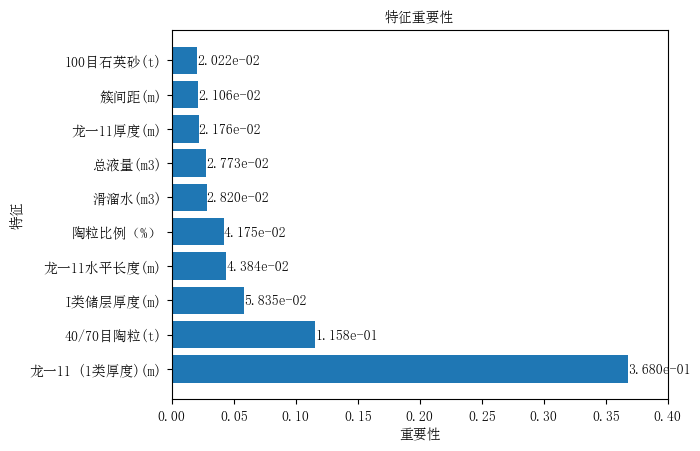

In [57]:
from matplotlib.font_manager import FontProperties
my_model = RandomForestRegressor().fit(X, y)
# my_model = AdaBoostRegressor(random_state=2023).fit(X, y)
# pred_y = my_model.predict(val_X)
# mse = mean_squared_error(val_y, pred_y)
# rmse = np.sqrt(mse)
# print("验证集的均方根误差：", rmse)

# viz = FeatureImportances(my_model)
# viz.fit(val_X, val_y)
# viz.show()

sorted_importances = []
sorted_features = []
# 打印每个特征的重要性程度
feature_importances = list(zip(X.columns, my_model.feature_importances_))
feature_importances.sort(key=lambda x: x[1], reverse=True)  # 按重要性程度进行降序排序

for feature, importance in feature_importances:
    feature = feature.replace('\n', '')
    sorted_features.append(feature)
    sorted_importances.append(importance)
    print(f"{feature}: {importance}")

sorted_features = sorted_features[0:10]
sorted_importances = sorted_importances[0:10]

# 设置中文字体
font = FontProperties(fname=r"SimSun.ttf")  # 替换成你电脑上的中文字体文件路径
plt.rcParams['font.sans-serif'] = [font.get_name()]  # 在绘制时使用这个字体  
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号  

fig, ax = plt.subplots()
ax.set_xlim(0, 0.4)
bars = ax.barh(sorted_features, sorted_importances)
ax.set_xlabel("重要性", fontproperties=font)
ax.set_ylabel("特征", fontproperties=font)
ax.set_title("特征重要性", fontproperties=font )
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, '%.3e' % width, ha='left', va='center')
plt.savefig('feature_importances.png', dpi=600, bbox_inches='tight')
plt.show()


In [28]:
# 使用FeatureImportances可视化特征重要性
# viz = FeatureImportances(my_model)
# viz.fit(val_X, val_y)
# viz.show()

# 打印每个特征的重要性程度
# feature_importances = list(zip(val_X.columns, viz.feature_importances_))
# feature_importances.sort(key=lambda x: x[1], reverse=True)  # 按重要性程度进行降序排序
# for feature, importance in feature_importances:
#     feature = feature.replace('\n', '')
#     print(f"{feature}: {importance}")

In [12]:
my_model = AdaBoostRegressor(random_state=2023).fit(X, y)

In [58]:
# 获取特定行的数据，并构造新的DataFrame
row_index = 99  # 要获取的行索引
selected_row = df.iloc[row_index:row_index+1]
selected_df = pd.DataFrame(selected_row)

# 打印新的DataFrame
# selected_df

y = selected_df[y_name]
X = selected_df[feature_names]

In [63]:
X['40/70目陶粒(t)']

井号
威204H10-4    581.3
Name: 40/70目陶粒(t), dtype: float64

In [60]:
y

井号
威204H10-4    2908.7308
Name: 首年产气量(104m3), dtype: float64

In [62]:
# X.loc[X.index[0],'I类储层连续厚度(m)'] = 5
selected_df

,首年产气量(104m3),研究所复核储量丰度-2023.6.30(108m3/km2),I类储层厚度(m),I类储层连续厚度(m),龙一11厚度\n(m),龙一11 (1类厚度)(m),龙一11水平长度(m),龙一11压力系数,龙一11钻遇率(%),龙一11底以上4米箱体钻遇率（%）,...,平均单\n段液量\n(m3),陶粒\n比例\n（%）,平均停\n泵压力\n(MPa),排量\n（m3/min）,压裂结束停泵压力(MPa),焖井时间(天),开始排液时井口套压\n(MPa),投产前累计\n排液量(m3),投产前返排率(%),井间距(m)
井号,,,,,,,,,,,,,,,,,,,,,
威204H10-4,2908.7308,10.7,9.46,3.18,6.8885,5.57,1300.0,1.92,100.0,94.3,...,1774.736842,0.273437,57.5,11.15,57.5,2.0,46.84,1302.4,3.862396,300


In [64]:
# 使用训练好的模型进行预测
y_pred = my_model.predict(X)
y_pred[0]

3202.1948493708715

In [65]:
# 定义函数计算给定特征值下的收益
def calculate_revenue(X, feature_name, feature_value, my_model):
    # 修改对应特征数值，用于预测
    X.loc[X.index[0], feature_name] = feature_value
    # 使用随机森林模型进行预测
    predicted_revenue = my_model.predict(X)[0]
    return predicted_revenue

In [66]:
start_value = 200.0
end_value = 3000.0
step = 10
feature_name = '40/70目陶粒(t)'

best_revenue = float('-inf')
optimal_feature_value = None

# 进行特征值的搜索
for feature_value in np.arange(start_value, end_value + step, step):
    revenue = calculate_revenue(X, feature_name, feature_value, my_model)
    if revenue > best_revenue:
        best_revenue = revenue
        optimal_feature_value = feature_value

print("Optimal feature value:", optimal_feature_value)
print("Maximum revenue:", best_revenue)

Optimal feature value: 2450.0
Maximum revenue: 4869.061962370872
